For help on using the functions see the documentation:

Hierarchical Clustering:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

KMeans:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Gaussian Mixture:
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

Principle Component Analysis (PCA):
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

(or Google sklearn PCA)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris = pd.DataFrame(iris.data[:,1:3], columns=iris.feature_names[1:3])
iris.head()

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# use StandardScaler to normalize features
iris_nm = StandardScaler().fit_transform(iris)
cluster = linkage(iris_nm)

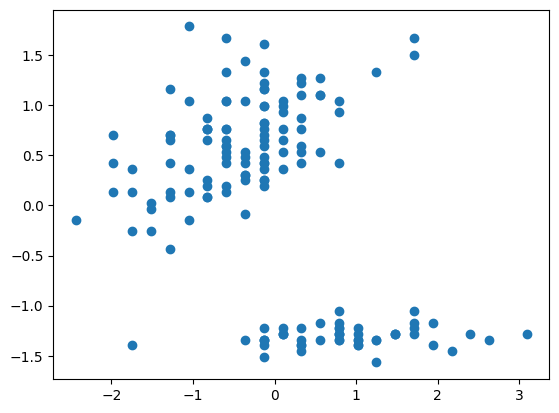

In [ ]:
# make a scatter plot
plt.scatter(iris_nm[:, 0], iris_nm[:, 1])

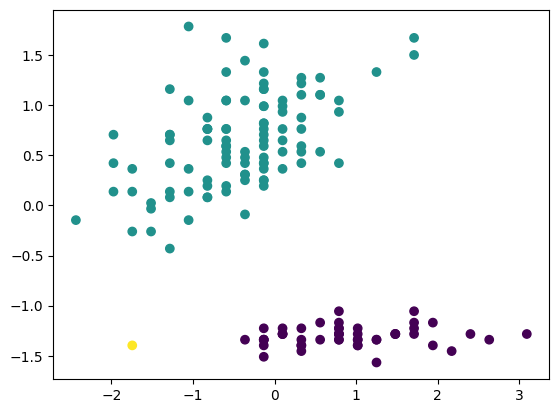

In [ ]:
from scipy.cluster.hierarchy import fcluster

# use fcluster to visualize the clusters better
fclust = fcluster(cluster, 3, criterion = "maxclust")
plt.scatter(iris_nm[:, 0], iris_nm[:, 1], c=fclust)

In [ ]:
from sklearn.cluster import KMeans
# fit KMeans object
# TODO

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

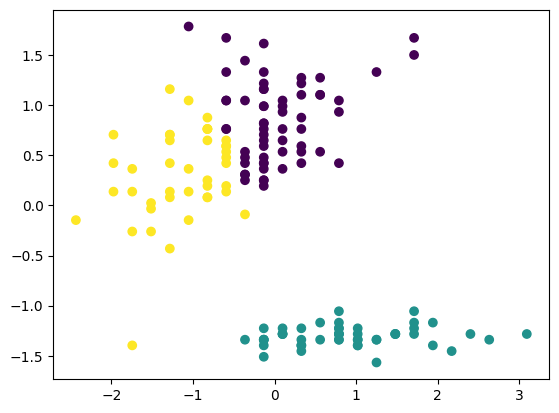

In [ ]:
# plot kmeans cluster results
labels = # TODO

plt.scatter(iris_nm[:,0], iris_nm[:,1], c=labels)

In [ ]:
# you can use these functions
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw ellipses
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [ ]:
from sklearn.mixture import GaussianMixture

# create GMM object
# TODO

<ipython-input-74-89cc8a9483d9>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


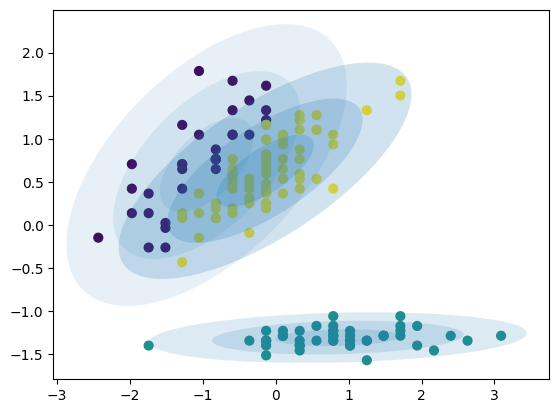

In [ ]:
# plot ellipses
plt.scatter(iris_nm[:,0], iris_nm[:,1], c=predictions, s=40, cmap='viridis')

w_factor = 0.2 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
  draw_ellipse(pos, covar, alpha=w * w_factor)